<a href="https://colab.research.google.com/github/shinobi3610/unsupervisde-learning/blob/main/object_detach_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install opencv-python

In [3]:
# Gọi thư viện 
import numpy as np
import cv2
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Lấy đường dẫn folder chứa ảnh
folder_dir = r"/content/drive/MyDrive/ML_DHBKHN/week2/data/image"

# In ra có bao nhiêu ảnh trong cat folder
print("My image: {} images".format(len(os.listdir(folder_dir))))

My image: 18 images


(487, 499, 3)


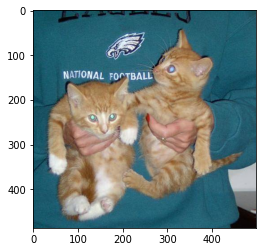

In [5]:
# Đọc ảnh
image = cv2.imread(os.path.join(folder_dir, "cat.821.jpg"))
# Do OpenCV đọc ảnh ở dạng BGR nên chúng ta dùng hàm cvtColor để chuyển sang RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Lấy size ảnh
print(image.shape)
# Hiển thị ảnh
plt.imshow(image)

In [6]:
# Chuyển shape của ma trận ảnh từ 3 chiều về 2 chiều (H-W-R, H-W-G, H-W-B)
# Tạo 1 list mà mỗi element là list gồm 3 feature là red, green, blue của 1 pixel 
image_px = []
for i in range(image.shape[0]): #shape 0 chứa size H (quét theo hàng)
    for j in range(image.shape[1]): #shape 1 chứa size W(quét cột)
        # Do đây là ảnh RGB nên ở mỗi ô sẽ có 3 giá trị màu là red, green, blue
        red, green, blue = image[i, j] #--> (40, 50, 60) #gọi image[i,j] sẽ return list chứa 3 giá trị red green blue
        # Chèn vào cuối list
        image_px.append([red, green, blue]) #list lưu giá trị 3 feature của pixel hiện tại
        
# Chuyển list sang dạng numpy array với loại của nó là float
image_px = np.array(image_px).astype(np.float32) #convert to float32 bit
# In ra size của image_px (487x499,3)
print(image_px.shape)
# Bảng data pixel
table = pd.DataFrame(image_px, columns=["red","green","blue"])
# Chuẩn hóa các đặc trưng về trong khoảng 0 đến 1 do mỗi pixel ảnh có giá trị lớn nhất của 1 kênh là 255 nên ta chia 255 (như StandardScaler trong sklearn)
image_px = image_px/255.0
# Hiển thị 10 samples trong table
table.head(10) 

(243013, 3)


,red,green,blue
0,28.0,87.0,105.0
1,24.0,83.0,101.0
2,26.0,85.0,103.0
3,32.0,91.0,109.0
4,30.0,89.0,107.0
5,21.0,80.0,98.0
6,18.0,77.0,95.0
7,21.0,80.0,98.0
8,20.0,79.0,97.0
9,21.0,80.0,98.0


[0 0 0 ... 0 0 0]


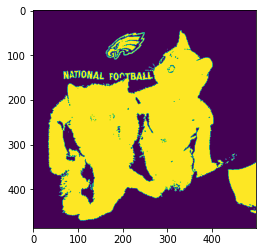

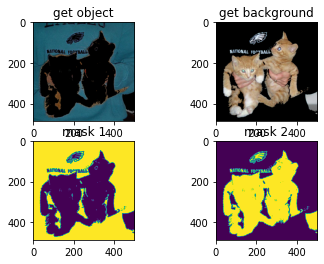

In [9]:
# Chúng ta sử dụng Kmeans để thử phân chia ảnh thành các vùng
# Ở đây chúng ta muốn lấy object ở trong ảnh chúng ta, ta có thể set n_clusters = 2 có nghĩa là 2 vùng: 1 vùng là pixel thuộc nền, 1 vùng là object
n_clusters = 2
# Gọi model với số cluster đã set bên trên và fit vào dữ liệu
kmean = KMeans(n_clusters=n_clusters).fit(image_px)
# Thực hiện predict: kết quả đầu ra là 1 ma trận chứa giá trị 0 và 1. 
clus = kmean.predict(image_px)
# clus = [0, 1, 0, 1]
# Tạo một ma trận 0 cùng size với ảnh gốc, 1 kênh để chứa ảnh binary
final_image = np.zeros((image.shape[0], image.shape[1], 1))

print(clus)
row = 0
col = 0
for pixel in clus: #quét từng pixel trong array kết quả kmeans(dc sắp xếp theo queue các hàng)
    if col >= image.shape[1]:
        col = 0
        row += 1
    final_image[row][col] = pixel #sắp xếp lại thành ma trận ảnh 2D
    col += 1
plt.imshow(final_image.reshape((final_image.shape[0], final_image.shape[1]))) #ảnh binary
final_image0 = np.where(final_image==0, 255, 0) #tạo mask, quét từng pixel, nếu pixel hiện tại là 0, trả ra 255, else trả ra 0 
final_image1 = np.where(final_image==1, 255, 0) #tạo mask, quét từng pixel, nếu pixel hiện tại là 1, trả ra 255, else trả ra 0
# Chuyển sang dạng uint8 để có thể nhân ảnh
final_image0 = np.uint8(final_image0)
final_image1 = np.uint8(final_image1)
# Thực hiện phép toán and giữa image gốc  và final_mask (có dc sau kmeans)
re0 = cv2.bitwise_and(image, image, mask=final_image0)
re1 = cv2.bitwise_and(image, image, mask=final_image1)
# Show ảnh kết quả
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.imshow(re0)
ax1.set_title("get object")
ax2.imshow(re1)
ax2.set_title("get background")
ax3.imshow(final_image0.reshape((final_image0.shape[0], final_image0.shape[1])))
ax3.set_title("mask 1")
ax4.imshow(final_image1.reshape((final_image1.shape[0], final_image1.shape[1])))
ax4.set_title("mask 2")
plt.show()
